In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [127]:
#import data
infile='C:/Users/a_mac/Desktop/jma_nitrate.csv'
data=pd.read_csv(infile)

In [128]:
# display data 
#data

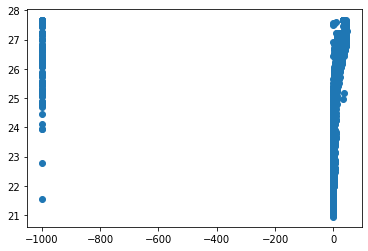

In [129]:
plt.scatter(data.nitrate,data.density)

In [130]:
# filter NO3 data (concentrations>0uM) because samples are flagged as -9999 (image above)
filter_NO3=data[data.nitrate>0]

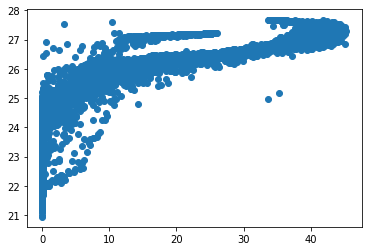

In [131]:
# re-plot nitrate values
plt.scatter(filter_NO3.nitrate,filter_NO3.density)

Text(0, 0.5, 'latitude')

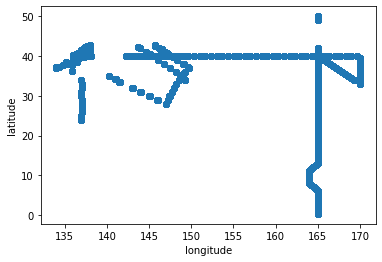

In [132]:
# from observing image above, it is clear that NO3 data comes from different profiles. 
# plot Lat and Long of samples to see the spatial distribution of samples
plt.scatter(data.lon,data.lat)
plt.xlabel('longitude')
plt.ylabel('latitude')

In [169]:
# change here the limits (LAT/LON) for the region you want to work with
longitude_lower_lim=130
longitude_upper_lim=180
latitude_lower_lim=0
latitude_upper_lim=60

In [170]:
# create filter(s) to saparate samples from more localized Lat/Long regions
cruise=data[(data.lon>longitude_lower_lim)&(data.lon<longitude_upper_lim)&(data.lat>latitude_lower_lim)&(data.lat<latitude_upper_lim)]
#cruise=data[(data.lon>168)&(data.lon<172)&(data.lat>30)&(data.lat<41)]
#cruise

In [171]:
# associate spatial and nitrate filters
filter_NO3_cruise = cruise[cruise.nitrate>0]

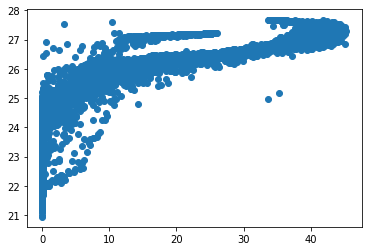

In [172]:
# plot the new NO3 profile for the given region
plt.scatter(filter_NO3_cruise.nitrate,filter_NO3_cruise.density)

# Build a model using KNN

In [173]:
#define the sets of data to be used
X=filter_NO3_cruise[["sal","theta"]]
y=filter_NO3_cruise[["nitrate"]]

In [174]:
#print the shape of the sets of data to corroborate that they will be useful while building the model
print(np.shape(X))
print(np.shape(y))

(15574, 2)
(15574, 1)


In [175]:
# Split the data into training/testing sets
# 1) import the fuction
from sklearn.model_selection import train_test_split

In [176]:
# 2) use the fuction 'train_test_split' to define the train and test datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [177]:
print(np.shape(X_train))
print(np.shape(y_train))

(12459, 2)
(12459, 1)


Test the accuracy of models with different values of 'k'

In [178]:
# pick model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
    
results = []
for n in range(1,20,1):
    res = []
    model = KNeighborsRegressor(n_neighbors=n)
    model.fit(X_train, y_train)
    print ('Neighbors = %s\n' % (int(n)))
    # compute the R^2 score
    accuracyscore = model.score(X_train,y_train)
    print("Training R^2 score: {0:.2f}\n".format(model.score(X_train,y_train)))
    # plot the model together with the data
    xfit = X_test
    yfit = model.predict(xfit)
    print("Testing R^2 score: {0:.2f}\n".format(model.score(xfit,yfit)))
    rmse = sqrt(mean_squared_error(y_test, yfit))
    print("RMSE = %s \n" % (rmse))
    res = [n,accuracyscore,rmse]
    results.append(res)

Neighbors = 1

Training R^2 score: 1.00

Testing R^2 score: 1.00

RMSE = 2.60583634978522 

Neighbors = 2

Training R^2 score: 0.99

Testing R^2 score: 1.00

RMSE = 2.430275808548893 

Neighbors = 3

Training R^2 score: 0.99

Testing R^2 score: 1.00

RMSE = 2.320552607722518 

Neighbors = 4

Training R^2 score: 0.99

Testing R^2 score: 1.00

RMSE = 2.29476945681954 

Neighbors = 5

Training R^2 score: 0.99

Testing R^2 score: 1.00

RMSE = 2.2658391196666807 

Neighbors = 6

Training R^2 score: 0.99

Testing R^2 score: 1.00

RMSE = 2.217848603336799 

Neighbors = 7

Training R^2 score: 0.98

Testing R^2 score: 1.00

RMSE = 2.2136395187022755 

Neighbors = 8

Training R^2 score: 0.98

Testing R^2 score: 1.00

RMSE = 2.195321052711501 

Neighbors = 9

Training R^2 score: 0.98

Testing R^2 score: 1.00

RMSE = 2.202207981381956 

Neighbors = 10

Training R^2 score: 0.98

Testing R^2 score: 1.00

RMSE = 2.193945148129644 

Neighbors = 11

Training R^2 score: 0.98

Testing R^2 score: 1.00

RM

In [179]:
myarray = np.asarray(results)

#make a dataframe with each column named for ploting
KNN_test_data = pd.DataFrame({'Kneighbors': myarray[:,0], 'AccScore': myarray[:,1], 'RMSE': myarray[:,2]})
KNN_test_data

,Kneighbors,AccScore,RMSE
0,1.0,0.999911,2.605836
1,2.0,0.992724,2.430276
2,3.0,0.989437,2.320553
3,4.0,0.987749,2.294769
4,5.0,0.986243,2.265839
5,6.0,0.985364,2.217849
6,7.0,0.984661,2.213640
7,8.0,0.984078,2.195321
8,9.0,0.983682,2.202208
9,10.0,0.983316,2.193945


Text(0, 0.5, 'RMSE')

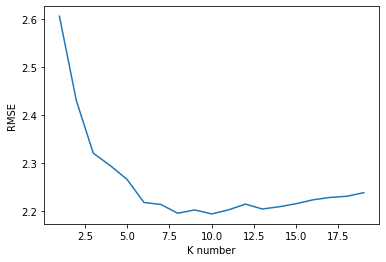

In [180]:
plt.plot(myarray[:,0],myarray[:,2])
plt.xlabel('K number')
plt.ylabel('RMSE')

# Build a model based on the above analysis (effect of k number)

Choose a number for k: 5
Training R^2 score: 0.99
Testing R^2 score: 1.00


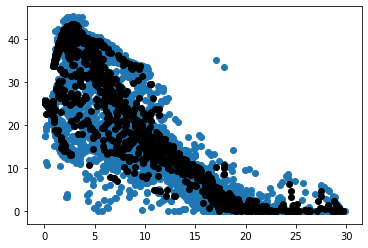

In [181]:
# use the script below to build the model based on KNN. 
# you will have to choose a number for 'k'.

n  = int(input('Choose a number for k: '))

# pick model
model = KNeighborsRegressor(n_neighbors=n)
model.fit(X_train, y_train)

# compute the R^2 score
print("Training R^2 score: {0:.2f}".format(model.score(X_train,y_train)))

# plot the model together with the data
xfit = X_test
yfit = model.predict(xfit)
print("Testing R^2 score: {0:.2f}".format(model.score(xfit,yfit)))

#plt.scatter(X_train[["sal"]],y_train)
plt.scatter(X_train[["theta"]],y_train)
plt.scatter(xfit[["theta"]], yfit,c = 'k')

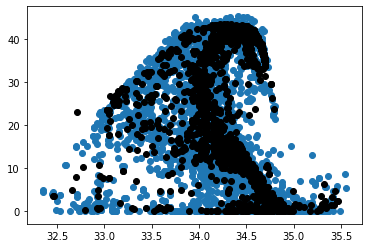

In [182]:
# plot the nitrate predictions vs the other test variable (i.e. salinity)
# and plot the train data to compare with the model
plt.scatter(X_train[["sal"]],y_train)
plt.scatter(xfit[["sal"]], yfit,c = 'k')

# Testing the model agains other data

In [183]:
#import data
infile_Kuro_noNO3='C:/Users/a_mac/Desktop/kuro_BGCargo_noNO3.csv'
data_Kuro_noNO3=pd.read_csv(infile_Kuro_noNO3)
data_Kuro_noNO3

,Date/GMT,Days since 1/1/1900,DEPTH[M],PRESSURE[DBAR],NA,SALINITY[PSS],TEMPERATURE[C],SIGMATHETA[KG/M3],OXYGEN[uMOL/KG],OXYGENSAT,LON,LAT
0,3/2/2013 13:38,41335.568,-989.324,-999.09,3,34.3676,3.2285,27.366,35.1,10.9,148.688,36.983
1,3/2/2013 13:38,41335.568,-941.762,-950.95,3,34.3560,3.3824,27.342,39.2,12.2,148.688,36.983
2,3/2/2013 13:38,41335.568,-892.728,-901.33,3,34.3380,3.4966,27.316,40.2,12.6,148.688,36.983
3,3/2/2013 13:38,41335.568,-842.920,-850.94,3,34.2972,3.4847,27.284,35.5,11.1,148.688,36.983
4,3/2/2013 13:38,41335.568,-794.287,-801.75,3,34.2942,3.6554,27.265,38.6,12.1,148.688,36.983
5,3/2/2013 13:38,41335.568,-743.793,-750.69,3,34.2645,3.8710,27.220,42.8,13.5,148.688,36.983
6,3/2/2013 13:38,41335.568,-694.959,-701.32,3,34.2373,3.9976,27.185,44.9,14.2,148.688,36.983
7,3/2/2013 13:38,41335.568,-645.648,-651.48,3,34.1913,4.2422,27.123,52.3,16.6,148.688,36.983
8,3/2/2013 13:38,41335.568,-596.098,-601.41,3,34.1309,4.5554,27.041,65.0,20.8,148.688,36.983
9,3/2/2013 13:38,41335.568,-546.298,-551.10,3,34.1024,5.0392,26.964,82.8,26.8,148.688,36.983


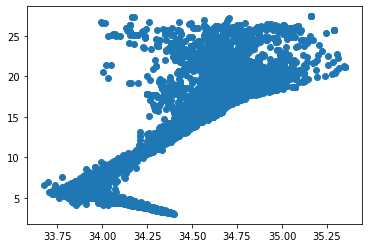

In [184]:
# plot predicting variables to get an idea of their behavior
plt.scatter(data_Kuro_noNO3[["SALINITY[PSS]"]],data_Kuro_noNO3[["TEMPERATURE[C]"]])

(145, 180)

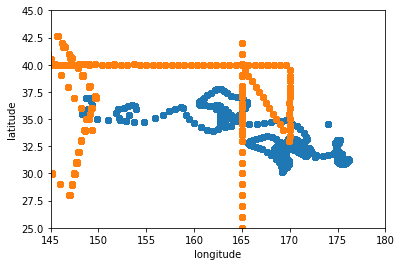

In [185]:
# plot Lat and Long of samples to see the spatial distribution of samples
plt.scatter(data_Kuro_noNO3[["LON"]],data_Kuro_noNO3[["LAT"]])
plt.scatter(data.lon,data.lat)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.ylim((25,45))
plt.xlim((145,180))

In [186]:
# create filter(s) to saparate samples from more localized Lat/Long regions
Kuro_noNO3_cruise=data_Kuro_noNO3[(data_Kuro_noNO3.LON>longitude_lower_lim)&(data_Kuro_noNO3.LON<longitude_upper_lim)&(data_Kuro_noNO3.LAT>latitude_lower_lim)&(data_Kuro_noNO3.LAT<latitude_upper_lim)]
#Kuro_noNO3_cruise=data_Kuro_noNO3[(data_Kuro_noNO3.LON>168)&(data_Kuro_noNO3.LON<172)&(data_Kuro_noNO3.LAT>30)&(data_Kuro_noNO3.LAT<41)]
Kuro_noNO3_cruise

,Date/GMT,Days since 1/1/1900,DEPTH[M],PRESSURE[DBAR],NA,SALINITY[PSS],TEMPERATURE[C],SIGMATHETA[KG/M3],OXYGEN[uMOL/KG],OXYGENSAT,LON,LAT
0,3/2/2013 13:38,41335.568,-989.324,-999.09,3,34.3676,3.2285,27.366,35.1,10.9,148.688,36.983
1,3/2/2013 13:38,41335.568,-941.762,-950.95,3,34.3560,3.3824,27.342,39.2,12.2,148.688,36.983
2,3/2/2013 13:38,41335.568,-892.728,-901.33,3,34.3380,3.4966,27.316,40.2,12.6,148.688,36.983
3,3/2/2013 13:38,41335.568,-842.920,-850.94,3,34.2972,3.4847,27.284,35.5,11.1,148.688,36.983
4,3/2/2013 13:38,41335.568,-794.287,-801.75,3,34.2942,3.6554,27.265,38.6,12.1,148.688,36.983
5,3/2/2013 13:38,41335.568,-743.793,-750.69,3,34.2645,3.8710,27.220,42.8,13.5,148.688,36.983
6,3/2/2013 13:38,41335.568,-694.959,-701.32,3,34.2373,3.9976,27.185,44.9,14.2,148.688,36.983
7,3/2/2013 13:38,41335.568,-645.648,-651.48,3,34.1913,4.2422,27.123,52.3,16.6,148.688,36.983
8,3/2/2013 13:38,41335.568,-596.098,-601.41,3,34.1309,4.5554,27.041,65.0,20.8,148.688,36.983
9,3/2/2013 13:38,41335.568,-546.298,-551.10,3,34.1024,5.0392,26.964,82.8,26.8,148.688,36.983


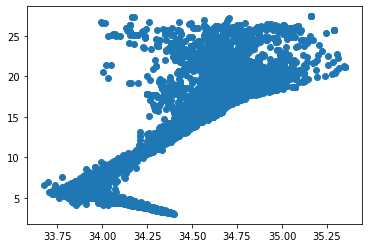

In [187]:
# plot predicting variables to get an idea of their behavior
plt.scatter(Kuro_noNO3_cruise[["SALINITY[PSS]"]],Kuro_noNO3_cruise[["TEMPERATURE[C]"]])

In [188]:
xkuro = Kuro_noNO3_cruise[["SALINITY[PSS]","TEMPERATURE[C]"]]
predictionsNO3=model.predict(xkuro)
print(np.shape(predictionsNO3))

(16136, 1)


import the data that contains the actual NO3 values to compare with your predictions

In [189]:
#import data
infile_Kuro_NO3='C:/Users/a_mac/Desktop/kuro_BGCargo_NO3.csv'
data_Kuro_NO3=pd.read_csv(infile_Kuro_NO3)
#data_Kuro_NO3

In [190]:
Kuro_NO3_cruise=data_Kuro_NO3[(data_Kuro_NO3.LON>longitude_lower_lim)&(data_Kuro_NO3.LON<longitude_upper_lim)&(data_Kuro_NO3.LAT>latitude_lower_lim)&(data_Kuro_NO3.LAT<latitude_upper_lim)]
#Kuro_NO3_cruise=data_Kuro_NO3[(data_Kuro_NO3.LON>168)&(data_Kuro_NO3.LON<172)&(data_Kuro_NO3.LAT>30)&(data_Kuro_NO3.LAT<41)]
#Kuro_noNO3_cruise=data_Kuro_noNO3[(data_Kuro_noNO3.LON>168)&(data_Kuro_noNO3.LON<172)&(data_Kuro_noNO3.LAT>30)&(data_Kuro_noNO3.LAT<41)]
#Kuro_NO3_cruise

In [191]:
realNO3=Kuro_NO3_cruise[["NITRATE[uMOL/KG]"]]
#realNO3=data_Kuro_NO3[["NITRATE[uMOL/KG]"]]

In [192]:
X=predictionsNO3
y=realNO3

In [193]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Coefficients: 
 [[1.09452458]]
Mean squared error: 5.84
Coefficient of determination: 0.97


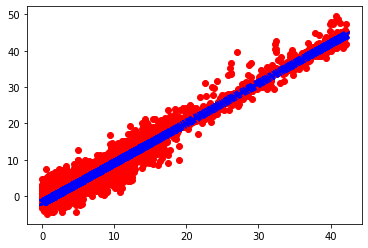

In [194]:
# Split the data into training/testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, y_pred,  '-x', color='blue', linewidth=1)

plt.show()